In [16]:
import numpy as np
import time
from Crypto.Util import number
import RSA

In [17]:
def BFA(n, e):
    p = 2
    while(n%p != 0):
        p +=1
    q = n/p
    phi = (p-1)*(q-1)
    d = RSA.InvertModulo(e, phi)
    return p, q, d

In [32]:
#generate prime numbers from size 8 bits all way up to 50 bits
#this function genarated primes numbers between two given number of bits
def genPrimes(start, end, step):
    if (start > end):
        temp = start
        start = end
        end = temp
    primesArray = []
    for j in range(start , end+1 , step):
        primesArray.append(number.getPrime(j))
    return np.array(primesArray)

In [34]:
P = genPrimes(8, 50, 2)
Q = genPrimes(8, 50, 2)
E = genPrimes(4, 25, 1)
print(P, Q, E.shape)
N = P * Q

[            211             877            2609            8741
           49019          193261          639083         3965659
         9061387        42062347       138259711      1061830043
      3120995783     13997900617     59756733767    151509698959
    905691561767   4396535451589  15823259360981  41266467973961
 159134742219073 875138744606647] [            211             719            3527           11887
           41777          261431          689891         2263619
        11451071        48808817       181381843       989020561
      2342938601     11130992479     55573807837    205796830381
    735505981169   2995202372003  14938244128117  66220500403231
 233554473929899 898769260339891] (22,)


In [35]:
times = []
optainedP = []
optainedQ = []
optainedD = []
for i in range(N.shape[0]):
    startTime = time.time()
    p, q,_ = BFA(N[i], E[i])
    excutionTime = time.time()-startTime
    optainedP.append(p)
    optainedQ.append(q)
    optainedD.append(d)
    print(p, q)
    print(excutionTime)
    times.append(excutionTime)
    


211 211.0
0.000232696533203125
719 877.0
0.00033283233642578125
2609 3527.0
0.001104593276977539
8741 11887.0
0.0036401748657226562
41777 49019.0
0.09084582328796387
193261 261431.0
0.15124845504760742
639083 689891.0
0.30152058601379395
2263619 3965659.0
0.8991262912750244
9061387 11451071.0
3.7003252506256104
42062347 48808817.0
17.380391597747803


In [30]:
print(times)

[0.00015783309936523438, 0.00028133392333984375, 0.0009710788726806641, 0.003265380859375, 0.013398170471191406, 0.03662753105163574, 0.19616413116455078, 0.9421553611755371, 2.386716604232788, 7.898291110992432, 43.373374462127686, 197.31491875648499, 584.6325716972351, 2.7418136596679688e-05, 2.4318695068359375e-05, 2.288818359375e-05, 2.4080276489257812e-05, 0.00020694732666015625, 2.7179718017578125e-05, 2.5033950805664062e-05, 0.0001819133758544922, 3.218650817871094e-05]


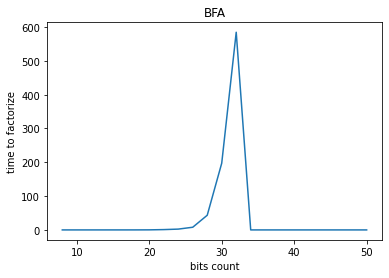

In [31]:
import matplotlib.pyplot as plt
plt.plot(np.arange(8, 51, 2), times)
plt.xlabel('bits count')
plt.ylabel('time to factorize')
plt.title('BFA')
plt.show()